In [212]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [213]:
data = pd.read_csv('water_potability.csv')

In [214]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [215]:
data['ph'].fillna(value=round(data['ph'].mean()), inplace=True)
data['Sulfate'].fillna(value=round(data['Sulfate'].mean()), inplace=True)
data['Trihalomethanes'].fillna(value=round(data['Trihalomethanes'].mean()), inplace=True)

In [216]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.068685,196.369496,22014.092526,7.122277,333.829232,426.205111,14.284970,66.376696,3.966786,0.390110
std,1.470239,32.879761,8768.570828,1.583085,36.142738,80.824064,3.308162,15.770115,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.000000,196.967627,20927.833607,7.130299,334.000000,421.884968,14.218338,66.000000,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [217]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

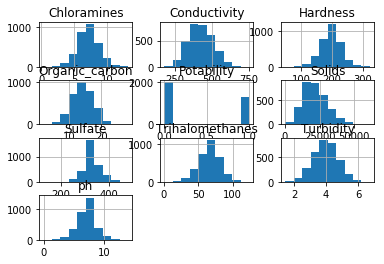

In [218]:
data.hist()
plt.show()

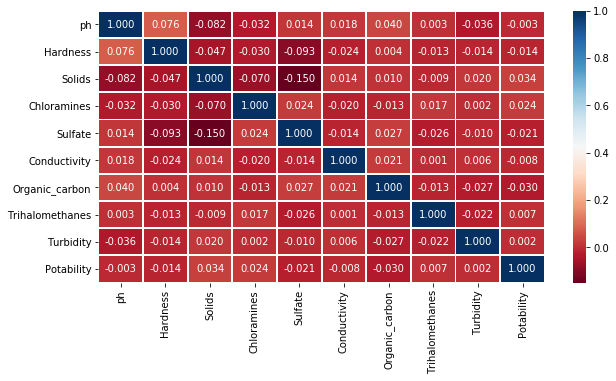

In [219]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True, cmap="RdBu",fmt='.3f',linewidths=.8)

In [220]:
dup = data.duplicated().sum()
print('Any Duplicate Value:',dup)

Any Duplicate Value: 0


In [221]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [222]:
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]  

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1998) 

from sklearn.utils import shuffle
data = pd.concat([notpotable, df_minority_upsampled])
data = shuffle(data) 

In [223]:
data.shape

(3996, 10)

In [224]:
X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

y = data[['Potability']]

In [225]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
scaler = RobustScaler()

In [227]:
y_train = np.ravel(y_train, order = 'C')
X_train = scaler.fit_transform(X_train, y_train)
X_validation = scaler.transform(X_validation)

In [228]:
model = KNeighborsClassifier(n_neighbors = 19, metric = 'minkowski', weights = 'distance')

model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='distance')

In [229]:
pickle.dump(model, open("waterpotability.sav", "wb"))
pickle.dump(scaler, open("scaler.sav", "wb"))

In [230]:
guess = model.predict_proba(X_validation)

In [231]:
guess

array([[0.54309529, 0.45690471],
       [0.57973708, 0.42026292],
       [0.62820378, 0.37179622],
       ...,
       [0.54084863, 0.45915137],
       [0.56955456, 0.43044544],
       [0.36789038, 0.63210962]])

In [232]:
fpr, tpr, threshold = roc_curve(y_validation, guess[:, 1])
roc_auc = auc(fpr, tpr)

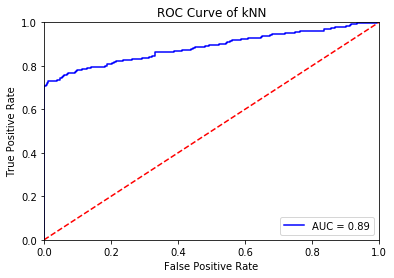

In [233]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [211]:
model.score(X_train, y_train)

1.0

In [203]:
accuracy_score(y_validation, guess)

0.755

In [204]:
recall_score(y_validation, guess)

0.8620689655172413

In [205]:
precision_score(y_validation, guess)

0.7142857142857143

In [206]:
f1_score(y_validation, guess)

0.7812500000000001

In [173]:
model_ = pickle.load(open("waterpotability.sav", "rb"))
scaled = pickle.load(open("scaler.sav", "rb"))
input_var = [0.5, 0.5, 0.7, 0.14, 0.006, 0.13, 0.002, 0.25, 0.23]
scaled_input_var = scaled.transform([input_var])
print(scaled_input_var)
prediction = model_.predict(scaled_input_var)
print(prediction)

[[ -4.12090885  -4.92755806  -1.82442671  -3.50232345 -10.08799972
   -3.65387806  -3.1694165   -3.223942    -3.47371438]]
[0]


In [556]:
!pip install sklearn

  Using cached https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz
  Stored in directory: C:\Users\HP\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
